# CAS Data Engineering FHNW
## Data Wrangling Module - Author F.Burnelli


### Exercise 3 MISSING DATA
### Note:use the Kernek: "Python (wrangling)"

In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

import missingno as msno


### Read Data

In [49]:
file_path = os.path.join("data", "dirty-loan-data.csv")
df = pd.read_csv(file_path,low_memory = False)



### Identify Missing

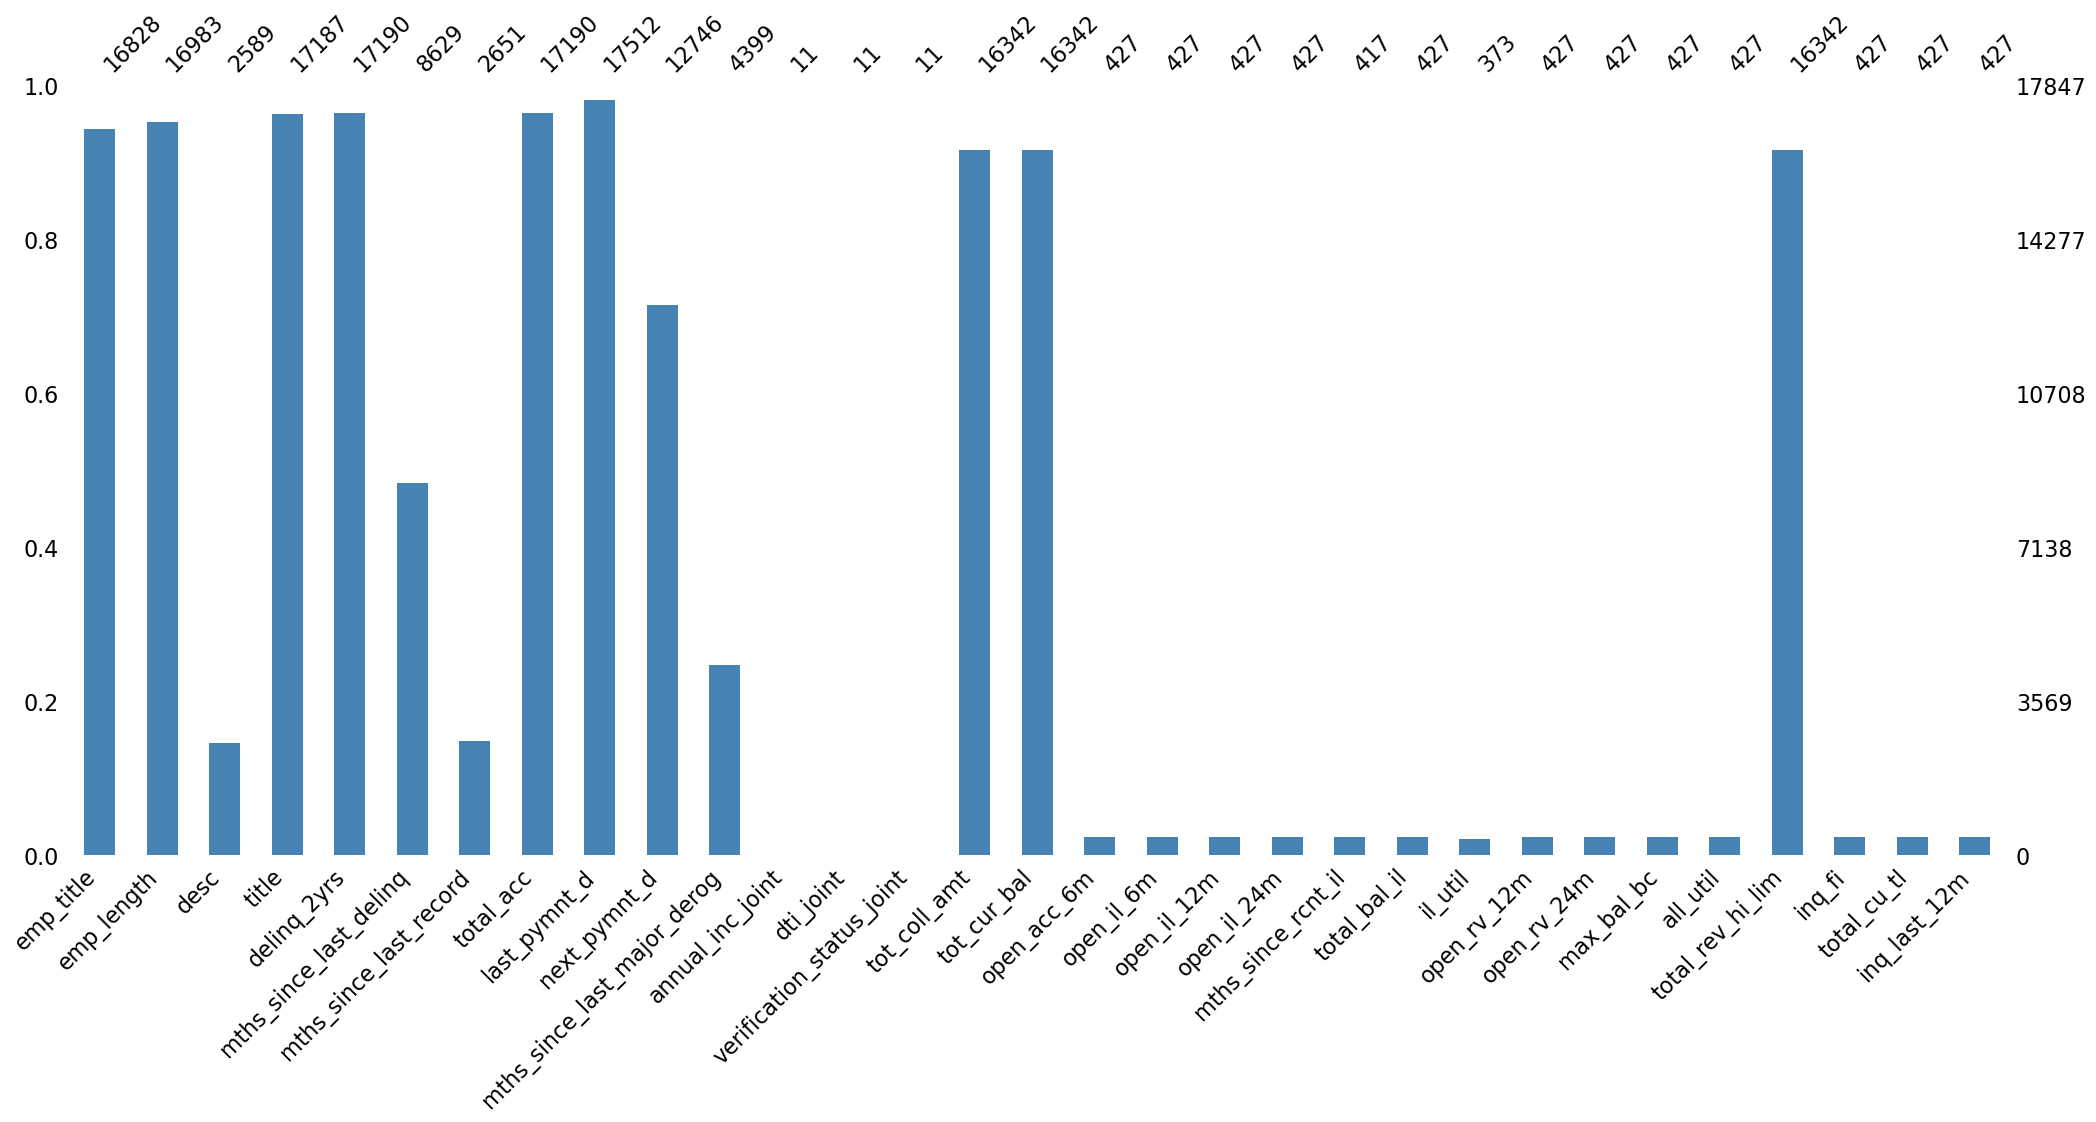

In [80]:
def plot_missing_data(df):
    """ plot Columns with Missing Values and Their Data Types
        Parameters:
        -----------
        df : pandas.DataFrame
        The input DataFrame to analyze for missing values. 
        Returns:
        --------
        None
    """
    threshold = int(df.shape[0]/100)# 1percent
    missing_counts = df.isnull().sum()
    df_missing = df[missing_counts[missing_counts > threshold].index.tolist()]
    msno.bar(df_missing, color='steelblue')
    
plot_missing_data(df)


### nullity matrix:quickly visually pick out patterns in data completion.

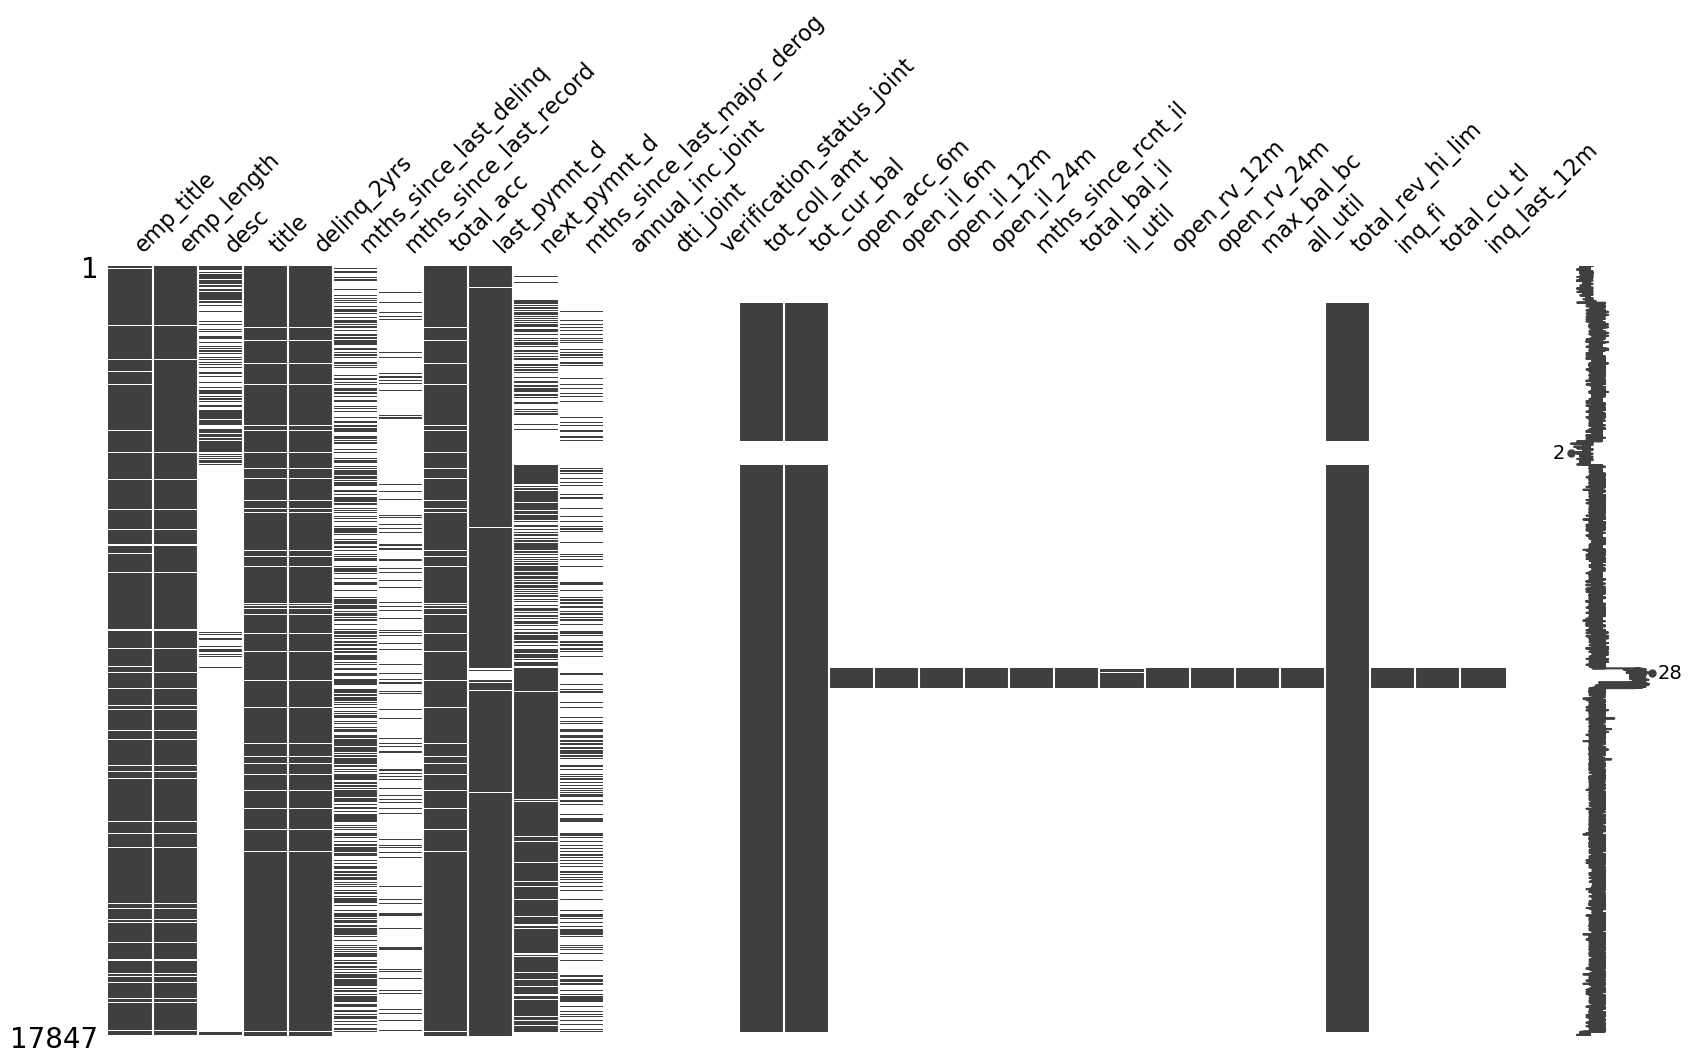

In [83]:
threshold = int(df.shape[0]/100)# 1percent
missing_counts = df.isnull().sum()
df_missing = df[missing_counts[missing_counts > threshold].index.tolist()]
msno.matrix(df_missing,label_rotation=45, sparkline=True,figsize=(20, 10))

plt.show()

### how strongly the presence/absence of one variable affects the presence of another

<Axes: >

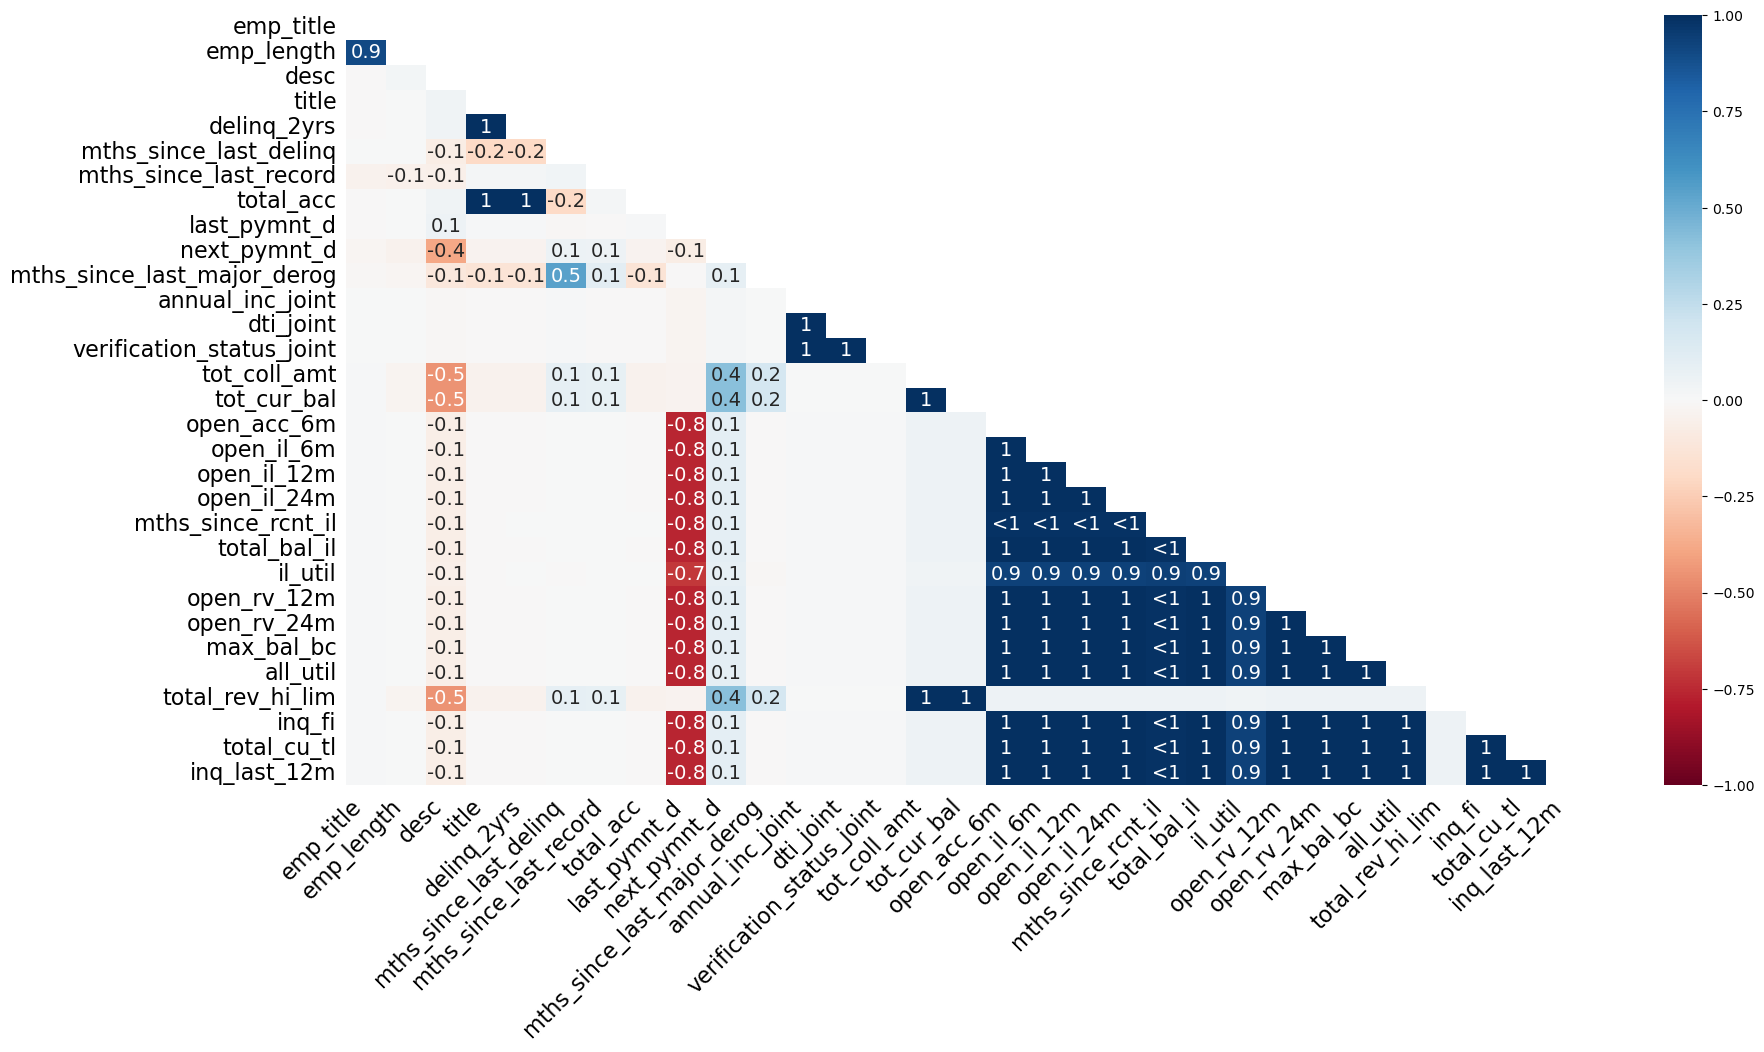

In [85]:
threshold = int(df.shape[0]/100)# 1percent
missing_counts = df.isnull().sum()
df_missing = df[missing_counts[missing_counts > threshold].index.tolist()]
msno.heatmap(df_missing,figsize=(20,10))


### Dendrogram  (Read it Top Down!)
The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

<Axes: >

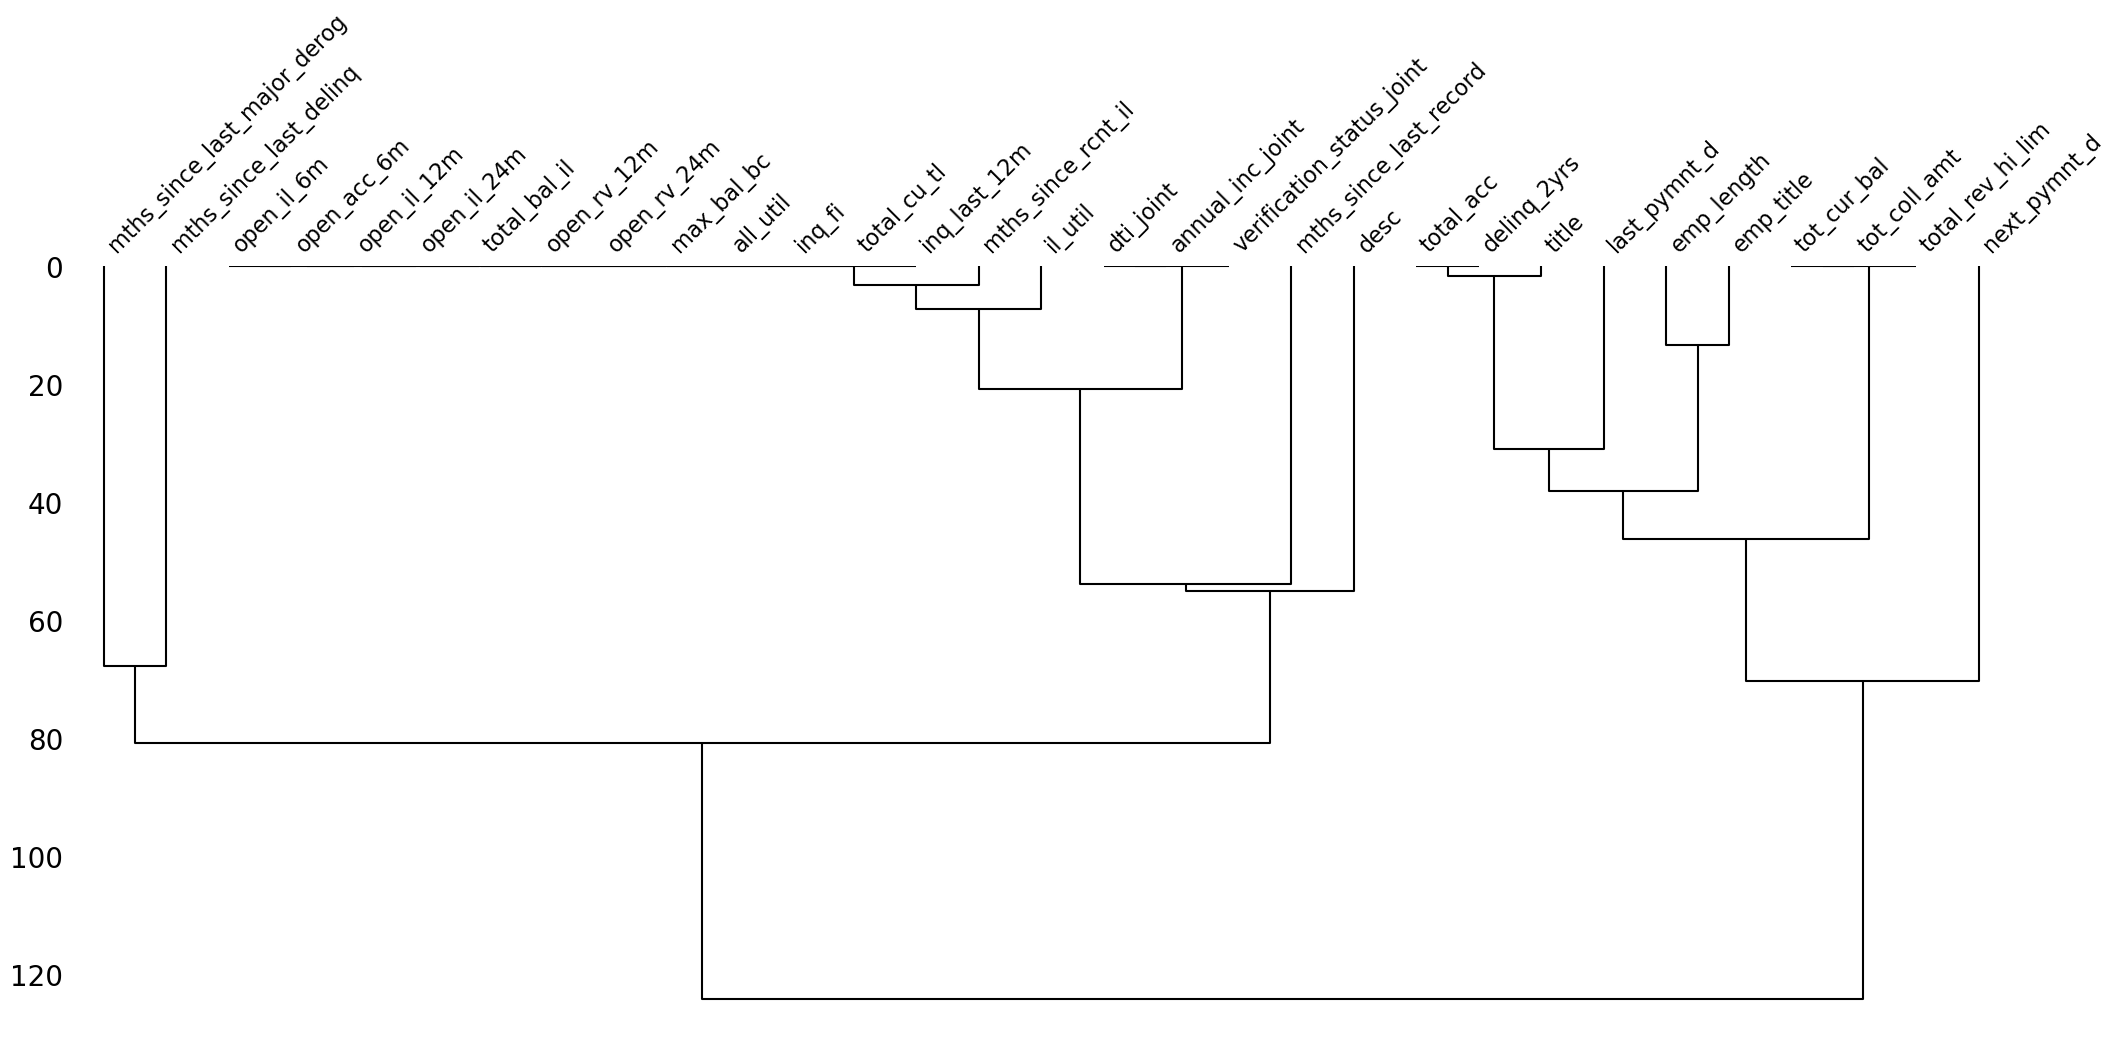

In [86]:
msno.dendrogram(df_missing)

## Imputation

### Numerical Median Imputer

In [13]:
df['delinq_2yrs'].isna().sum()

657

In [14]:
_df = df.copy()
imp = SimpleImputer(strategy='median')
_df['delinq_2yrs'] = imp.fit_transform(df['delinq_2yrs'].values.reshape(-1, 1) )

_df['delinq_2yrs'].isna().sum()

0

### Categorical Modus Imputer

In [22]:
df['emp_title'].isna().sum()

1019

In [24]:
_df = df.copy()
imp = SimpleImputer(strategy='most_frequent')
_df['emp_title'] = imp.fit_transform(df['emp_title'].values.reshape(-1, 1)).ravel()

_df['emp_title'].isna().sum()

0

In [25]:
df['emp_title'].isna().sum()


1019

### Multivariate: does not suit always...

In [44]:

imp = IterativeImputer(max_iter=30, random_state=0)
_df['delinq_2yrs'] = imp.fit_transform(df[['delinq_2yrs']]).ravel()

_df['delinq_2yrs'].isna().sum()

0

In [45]:
_df['delinq_2yrs'].value_counts().head(5)

delinq_2yrs
0.000000    14424
1.000000     2283
0.252531      657
3.000000      232
4.000000      105
Name: count, dtype: int64

### Business Plausibilisation


### Why Missing...?
- Unemployment?
- Technical Issue?

<Axes: xlabel='emp_length'>

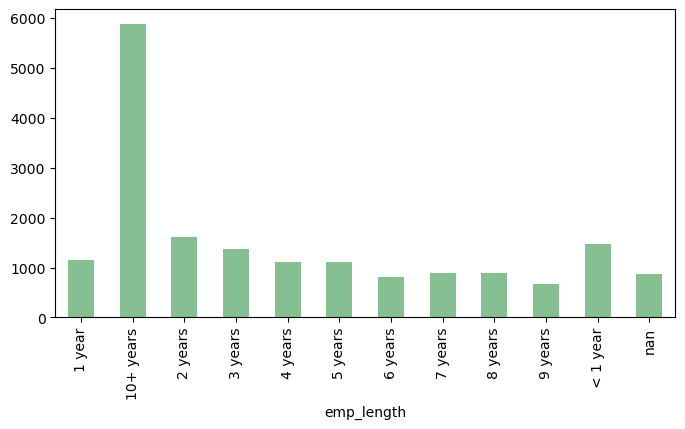

In [87]:
df['emp_length'].value_counts(dropna=False).sort_index().plot(kind='bar', color='#86bf91', figsize=(8, 4))



### trying to understand which employment title....

In [88]:
filtered_rows = df[df['emp_length'].isnull()][['emp_title', 'emp_length']]
filtered_rows.groupby('emp_title', dropna=False).size().reset_index(name='count')

,emp_title,count
0,AL Medicaid Agency,1
1,Aegis Communications Group,1
2,Consultant,1
3,Intern,1
4,JP Morgan Chase,1
5,Retired,1
6,SALES ASSOCIATE,1
7,The Rockefeller University,1
8,customer service,1
9,first student management,1
